# Problem Statement

    Perform Principal component analysis and perform clustering using first 
    3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data 
    (class column we have ignored at the begining who shows it has 3 clusters)df

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('/content/wine.csv')
df.head(6)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [3]:
#Data Description

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
df.describe()

In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

# PCA

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [8]:
sc= StandardScaler()

x=sc.fit_transform(df)
x 

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [9]:
pca = PCA()
pcs = pca.fit_transform(x)
pcs

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01, ...,
         5.52927766e-01, -3.02978176e-01,  2.00857450e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00, ...,
         3.94971160e-01, -1.46645308e-01,  1.26402355e-01],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01, ...,
         1.89799314e-03,  2.12780166e-02, -5.57515155e-02],
       ...,
       [ 3.02727243e+00, -2.75604024e+00, -9.40803036e-01, ...,
         6.93336340e-01,  1.67035660e-01, -3.16957430e-02],
       [ 2.75522166e+00, -2.29378408e+00, -5.50473677e-01, ...,
         3.44119826e-01, -1.09514873e-01,  1.02823104e-01],
       [ 3.49633565e+00, -2.76060799e+00,  1.01315115e+00, ...,
        -1.89866131e-01, -1.64090011e-01, -2.64916504e-01]])

In [10]:
np.cumsum(pca.explained_variance_ratio_)

array([0.39542486, 0.57378745, 0.67707846, 0.74335831, 0.80603706,
       0.85409266, 0.89364973, 0.91865217, 0.93969088, 0.95842703,
       0.97455906, 0.98661596, 0.99587055, 1.        ])

In [11]:
pca = PCA(n_components=3)
pcs = pca.fit_transform(x)
pcs

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01],
       [-3.92258841e+00, -2.76821026e+00, -1.74968168e-01],
       [-1.40751111e+00, -8.67773087e-01,  2.02582949e+00],
       [-3.28812981e+00, -2.13017513e+00, -6.28992339e-01],
       [-2.75057754e+00, -1.17916999e+00, -9.77337471e-01],
       [-2.39286652e+00, -1.61128232e+00,  1.45729462e-01],
       [-2.79525633e+00, -9.23179517e-01, -1.77092548e+00],
       [-3.00559666e+00, -7.96284169e-01, -9.83741629e-01],
       [-3.67868855e+00, -1.31252342e+00, -4.21854170e-01],
       [-2.10963477e+00, -6.12981986e-01, -1.19156995e+00],
       [-2.43845636e+00, -6.78523310e-01, -8.65513701e-01],
       [-3.67349453e+00, -1.14012136e+00, -1.20376870e+00],
       [-4.44157575e+00, -2.11031917e+00, -1.26245041e+00],
       [-2.60892387e+00, -1.66641801e+00,  2.17632760e-01],
       [-2.47542846e+00, -2.33089672e+00

In [12]:
np.cumsum(pca.explained_variance_ratio_)

array([0.39542486, 0.57378745, 0.67707846])

In [13]:
data = pd.DataFrame(pcs, columns=['pc1','pc2','pc3'])
data['Type']=df['Type']

In [14]:
data

,pc1,pc2,pc3,Type
0,-3.522934,-1.453098,-0.164795,1
1,-2.528858,0.330019,-2.026707,1
2,-2.785029,-1.036936,0.983238,1
3,-3.922588,-2.768210,-0.174968,1
4,-1.407511,-0.867773,2.025829,1
...,...,...,...,...
173,3.627996,-2.206617,-0.343668,3
174,2.942729,-1.752263,0.207480,3
175,3.027272,-2.756040,-0.940803,3
176,2.755222,-2.293784,-0.550474,3


<Axes: >

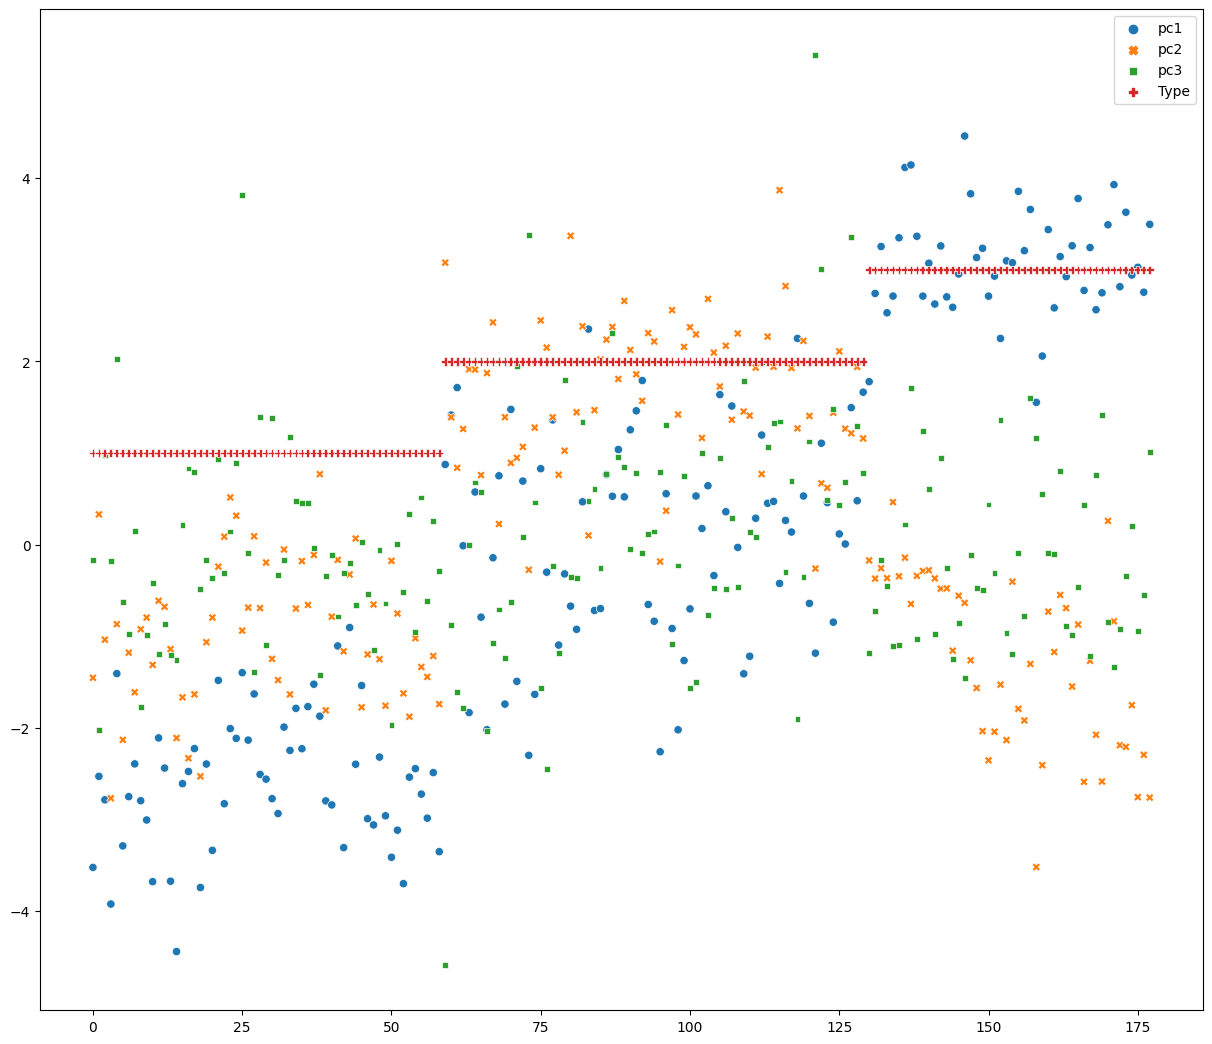

In [15]:
plt.figure(figsize=(15,13))
sns.scatterplot(data=data)

# Hierarchical Clustering

In [16]:
from scipy.cluster import hierarchy
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering

In [17]:
df_norm=pd.DataFrame(normalize(df),columns=df.columns)

In [18]:
df_norm.head(6)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.000932,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738
1,0.000948,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336
2,0.000841,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996175
3,0.000674,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961
4,0.001343,0.017775,0.003477,0.003853,0.028193,0.158417,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986752
5,0.000688,0.009763,0.001210,0.001684,0.010450,0.077002,0.002248,0.002331,0.000234,0.001354,0.004641,0.000722,0.001959,0.996907


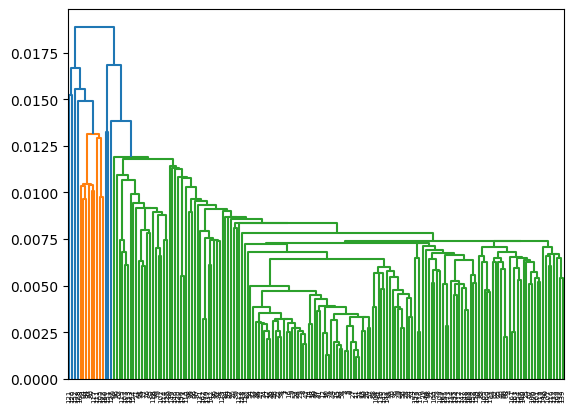

In [19]:
lk= hierarchy.linkage(df_norm, method='single')
dendo= hierarchy.dendrogram(lk)

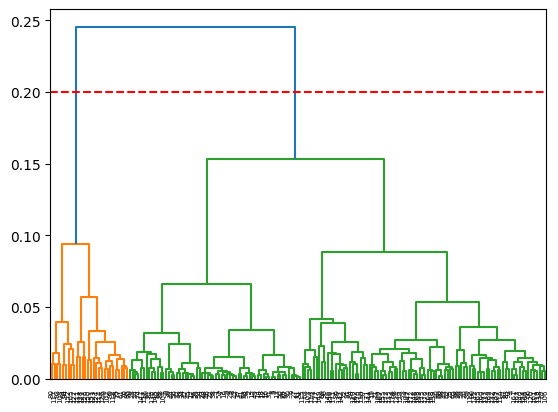

In [20]:
lk= hierarchy.linkage(df_norm, method='complete')
dendo= hierarchy.dendrogram(lk)
plt.axhline(y=0.2, c='red', linestyle='--' )

# Model building

In [21]:
hc= AgglomerativeClustering(n_clusters=3)

y=hc.fit_predict(df_norm)

In [22]:
y 

array([0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [23]:
df['Cluster']= y
df.head(6)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,2


In [24]:
df.groupby('Cluster').agg('mean')

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Cluster,,,,,,,,,,,,,,
0,2.319588,12.887732,2.593608,2.361753,20.193814,98.680412,2.031959,1.522165,0.400928,1.444124,5.328557,0.882124,2.346392,660.453608
1,2.083333,12.309722,2.195556,2.306667,20.905556,97.416667,2.313056,2.162778,0.350000,1.603611,3.492222,1.011944,2.727222,411.416667
2,1.000000,13.796667,1.894444,2.424667,16.860000,103.888889,2.848000,3.015556,0.287111,1.897111,5.727778,1.076222,3.091111,1201.600000


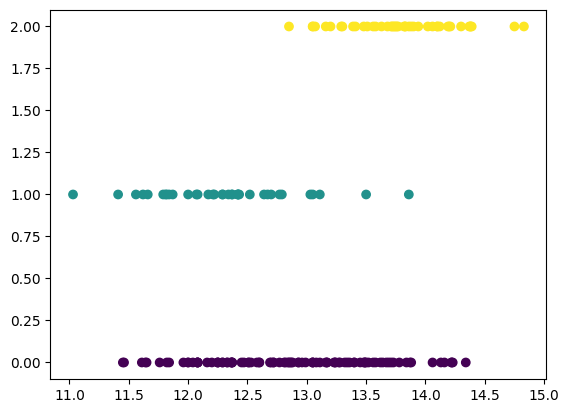

In [25]:
plt.scatter(df['Alcohol'],df['Cluster'], c=y)

# K-means

In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [27]:
sc = StandardScaler()

x= sc.fit_transform(df)
x 

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  1.84791957,
         1.01300893, -0.83865922],
       [-1.21394365,  0.24628963, -0.49941338, ...,  1.1134493 ,
         0.96524152,  1.53088587],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.78858745,
         1.39514818,  1.53088587],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.48544548,
         0.28057537, -0.83865922],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.40069891,
         0.29649784, -0.83865922],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.42894777,
        -0.59516041, -0.83865922]])

In [28]:
df_sc=pd.DataFrame(x ,columns=df.columns)
df_sc.head(5)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,-0.838659
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1.530886
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1.530886
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1.530886
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,-0.838659


In [29]:
km= KMeans()
y= km.fit_predict(x)
y 

array([7, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7,
       1, 1, 7, 7, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 7, 7, 1, 1, 3,
       7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 4, 5, 5, 4, 4, 5, 5,
       4, 4, 5, 0, 5, 7, 5, 7, 0, 4, 4, 5, 0, 3, 4, 4, 5, 2, 0, 4, 5, 5,
       5, 5, 5, 5, 5, 3, 4, 0, 0, 4, 4, 3, 4, 4, 3, 4, 4, 5, 4, 5, 4, 0,
       0, 3, 5, 5, 5, 5, 4, 5, 2, 3, 3, 7, 3, 3, 3, 3, 3, 5, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6,
       2, 2, 6, 6, 6, 6, 2, 2, 2, 2, 6, 2, 6, 2, 6, 6, 2, 2, 6, 2, 6, 6,
       6, 6], dtype=int32)

In [30]:
df1 = pd.DataFrame(x, columns=df.columns)
df1['cluster'] = y
df1.head(5)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster,cluster
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,-0.838659,7
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1.530886,1
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1.530886,1
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1.530886,1
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,-0.838659,7


In [31]:
km.cluster_centers_

array([[ 7.99603601e-02, -1.28389485e+00, -6.50894034e-01,
        -4.07632118e-01, -2.01174075e-01,  1.58916852e+00,
         1.98108492e-01,  7.33234123e-04, -1.07252568e+00,
         1.63005344e+00, -9.35687753e-01,  1.53778687e-01,
         2.92466916e-01, -1.18282474e-01, -5.42466081e-01],
       [-1.21394365e+00,  9.83331056e-01, -3.96680818e-01,
         2.12557389e-01, -7.91234085e-01,  2.91196901e-01,
         8.85909309e-01,  9.90198215e-01, -6.02263160e-01,
         5.36509597e-01,  2.89686882e-01,  5.21096434e-01,
         6.77161411e-01,  1.44801077e+00,  1.53088587e+00],
       [ 1.29038669e+00, -5.17678549e-02,  1.01995389e+00,
        -1.08507583e-02,  3.21176513e-01, -3.03477378e-01,
        -1.13499259e+00, -1.31316773e+00,  8.14235608e-01,
        -1.10030121e+00,  3.79534289e-01, -1.01771151e+00,
        -1.21662572e+00, -4.40352925e-01, -8.00440748e-01],
       [-6.29990716e-03, -8.17685263e-01,  8.18356120e-01,
        -2.28520414e-01,  4.61955283e-01, -6.46541271

# Elbow Graph

In [32]:
wcss=[]

for i in range (1,21):
    km= KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [33]:
wcss

[2670.0,
 1851.284234066805,
 1379.0781523805454,
 1255.0863554168009,
 1169.8186209130336,
 1113.4854098350775,
 1068.0356234166331,
 989.7302066329529,
 967.3675889559617,
 911.0613909596277,
 868.8339818700638,
 841.7688791171188,
 824.1472250346633,
 811.7994041671998,
 768.4278229701844,
 757.0890668870791,
 730.0014928231933,
 704.8138660175265,
 683.0186447827621,
 677.6981197185123]

Text(0.5, 1.0, 'Elbow Curve')

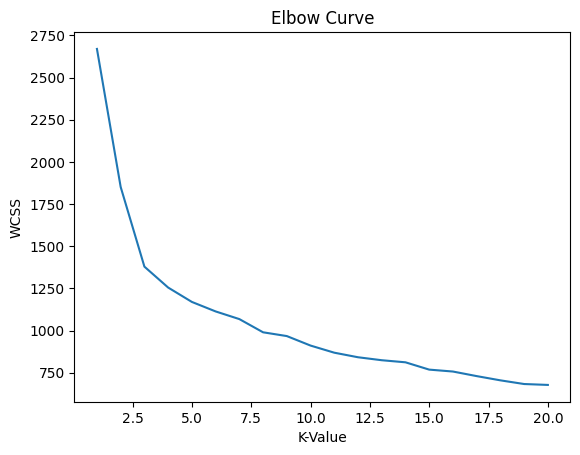

In [34]:
plt.plot(range(1,21), wcss)
plt.xlabel('K-Value')
plt.ylabel('WCSS')
plt.title('Elbow Curve')

# Final Model

In [35]:
km= KMeans(n_clusters=3)
y=km.fit_predict(x)
y 

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [36]:
df['Cluster']=y
df.head(6)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,2


In [37]:
df.groupby('Cluster').agg('mean')

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Cluster,,,,,,,,,,,,,,
0,2.979592,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020
1,1.985507,12.268406,1.944203,2.239855,20.042029,93.188406,2.254638,2.081449,0.362319,1.602174,3.083478,1.050812,2.791594,509.101449
2,1.033333,13.719333,1.964000,2.456500,17.278333,107.866667,2.845500,2.974833,0.288667,1.927333,5.462667,1.071833,3.157333,1117.816667


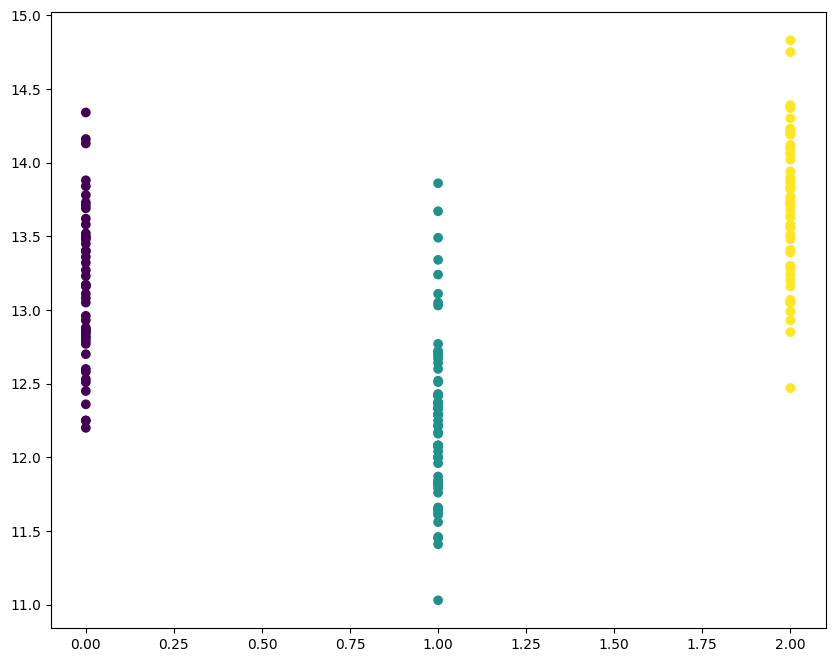

In [38]:
plt.figure(figsize=(10,8))
plt.scatter(df['Cluster'], df['Alcohol'], c=km.labels_)